# 주식:현금:채권 혼합 전략  p148
 - 투자기간 : 2001년 1월 ~2017년 6월
 - 투자자산 : 코스피200지수, 현금(3년만기국고채지수), 10년만기국고채지수/20년만기국고채지수
 - 매수원칙 : 1:1:1로 매수
 - 매도원칙 : 매월말 리밸런싱

그림 2-17

In [1]:
from settings import *

In [2]:
tickers = ['kodex200', 'kbond3y', 'kbond10y', 'kbond20y']
read_df = get_data()
read_df = read_df[tickers]
read_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5433 entries, 2000-01-04 to 2021-12-30
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   kodex200  5433 non-null   float64
 1   kbond3y   5433 non-null   float64
 2   kbond10y  5433 non-null   float64
 3   kbond20y  5433 non-null   float64
dtypes: float64(4)
memory usage: 212.2 KB


In [3]:
data = read_df['2001':].copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5192 entries, 2001-01-02 to 2021-12-30
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   kodex200  5192 non-null   float64
 1   kbond3y   5192 non-null   float64
 2   kbond10y  5192 non-null   float64
 3   kbond20y  5192 non-null   float64
dtypes: float64(4)
memory usage: 202.8 KB


In [4]:
주식현금채권혼합전략 = bt.Strategy('1:1분산리밸런싱',
    [
        bt.algos.RunMonthly(run_on_end_of_period=True), #매월말
        bt.algos.PrintDate(),
        bt.algos.SelectAll(),
        bt.algos.WeighEqually(),
        bt.algos.Rebalance()
    ]
)

In [5]:
bt_kodex200 = long_only_ew(data, ['kodex200'], 'kodex200', initial_capital=100000000)
bt_kbond3y  = long_only_ew(data, ['kbond3y'],  'kbond3y', initial_capital=100000000)
bt_kbond10y = long_only_ew(data, ['kbond10y'], 'kbond10y', initial_capital=100000000)
bt_kbond20y = long_only_ew(data, ['kbond20y'], 'kbond20y', initial_capital=100000000)

In [6]:
bt_test10 = bt.Backtest(주식현금채권혼합전략, data[['kodex200', 'kbond3y', 'kbond10y']], name='1:1:1(10년국채)', initial_capital=100000000)
bt_test20 = bt.Backtest(주식현금채권혼합전략, data[['kodex200', 'kbond3y', 'kbond20y']], name='1:1:1(20년국채)', initial_capital=100000000)

In [7]:
r20 = bt.run(bt_test20)
r20_assets = bt.run(bt_kodex200, bt_kbond3y, bt_kbond20y)
r20_all = bt.run(bt_kodex200, bt_kbond3y, bt_kbond20y, bt_test20)

2001-01-02 00:00:00
2001-01-31 00:00:00
2001-02-28 00:00:00
2001-03-30 00:00:00
2001-04-30 00:00:00
2001-05-31 00:00:00
2001-06-29 00:00:00
2001-07-31 00:00:00
2001-08-31 00:00:00
2001-09-28 00:00:00
2001-10-31 00:00:00
2001-11-30 00:00:00
2001-12-28 00:00:00
2002-01-31 00:00:00
2002-02-28 00:00:00
2002-03-29 00:00:00
2002-04-30 00:00:00
2002-05-31 00:00:00
2002-06-28 00:00:00
2002-07-31 00:00:00
2002-08-30 00:00:00
2002-09-30 00:00:00
2002-10-31 00:00:00
2002-11-29 00:00:00
2002-12-30 00:00:00
2003-01-30 00:00:00
2003-02-28 00:00:00
2003-03-31 00:00:00
2003-04-30 00:00:00
2003-05-30 00:00:00
2003-06-30 00:00:00
2003-07-31 00:00:00
2003-08-29 00:00:00
2003-09-30 00:00:00
2003-10-31 00:00:00
2003-11-28 00:00:00
2003-12-30 00:00:00
2004-01-30 00:00:00
2004-02-27 00:00:00
2004-03-31 00:00:00
2004-04-30 00:00:00
2004-05-31 00:00:00
2004-06-30 00:00:00
2004-07-30 00:00:00
2004-08-31 00:00:00
2004-09-30 00:00:00
2004-10-29 00:00:00
2004-11-30 00:00:00
2004-12-30 00:00:00
2005-01-31 00:00:00


In [8]:
r20.backtests['1:1:1(20년국채)'].stats.display()

Stats for price from 2001-01-01 00:00:00 - 2021-12-30 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
430.16%             0.99  8.27%   -19.74%

Annualized Returns:
mtd    3m      6m      ytd     1y      3y     5y     10y    incep.
-----  ------  ------  ------  ------  -----  -----  -----  --------
2.00%  -0.17%  -3.60%  -0.94%  -0.94%  6.56%  5.01%  5.14%  8.27%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  0.99     1.03       1.27
mean    8.46%    7.80%      7.96%
vol     8.57%    7.59%      6.26%
skew    -0.30    0.17       -0.05
kurt    8.87     1.37       -0.61
best    4.39%    9.70%      18.33%
worst   -5.64%   -6.00%     -3.44%

Drawdowns:
max      avg       # days
-------  ------  --------
-19.74%  -1.30%     24.82

Misc:
---------------  ------
avg. up month    1.90%
avg. down month  -1.45%
up year %        85.00%
12m up %     

In [9]:
r20_all.display()

Stat                 kodex200    kbond3y     kbond20y    1:1:1(20년국채)
-------------------  ----------  ----------  ----------  -----------------
Start                2001-01-01  2001-01-01  2001-01-01  2001-01-01
End                  2021-12-30  2021-12-30  2021-12-30  2021-12-30
Risk-free rate       0.00%       0.00%       0.00%       0.00%

Total Return         781.49%     108.87%     428.77%     430.16%
Daily Sharpe         0.58        2.53        0.66        0.99
Daily Sortino        0.93        4.17        0.99        1.60
CAGR                 10.92%      3.57%       8.26%       8.27%
Max Drawdown         -52.67%     -1.91%      -24.47%     -19.74%
Calmar Ratio         0.21        1.87        0.34        0.42

MTD                  6.52%       -0.07%      -0.44%      2.00%
3m                   -0.81%      -0.26%      0.09%       -0.17%
6m                   -9.05%      -0.32%      -1.83%      -3.60%
YTD                  2.77%       -0.68%      -5.54%      -0.94%
1Y                  

In [10]:
r20_all.prices.resample('M').last().to_drawdown_series().describe()

,kodex200,kbond3y,kbond20y,1:1:1(20년국채)
count,252.000,252.000,252.000,252.000
mean,-0.099,-0.001,-0.060,-0.013
std,0.092,0.003,0.055,0.023
min,-0.455,-0.019,-0.225,-0.156
25%,-0.145,-0.001,-0.103,-0.017
50%,-0.084,0.000,-0.054,-0.004
75%,-0.023,0.000,0.000,0.000
max,0.000,0.000,0.000,0.000


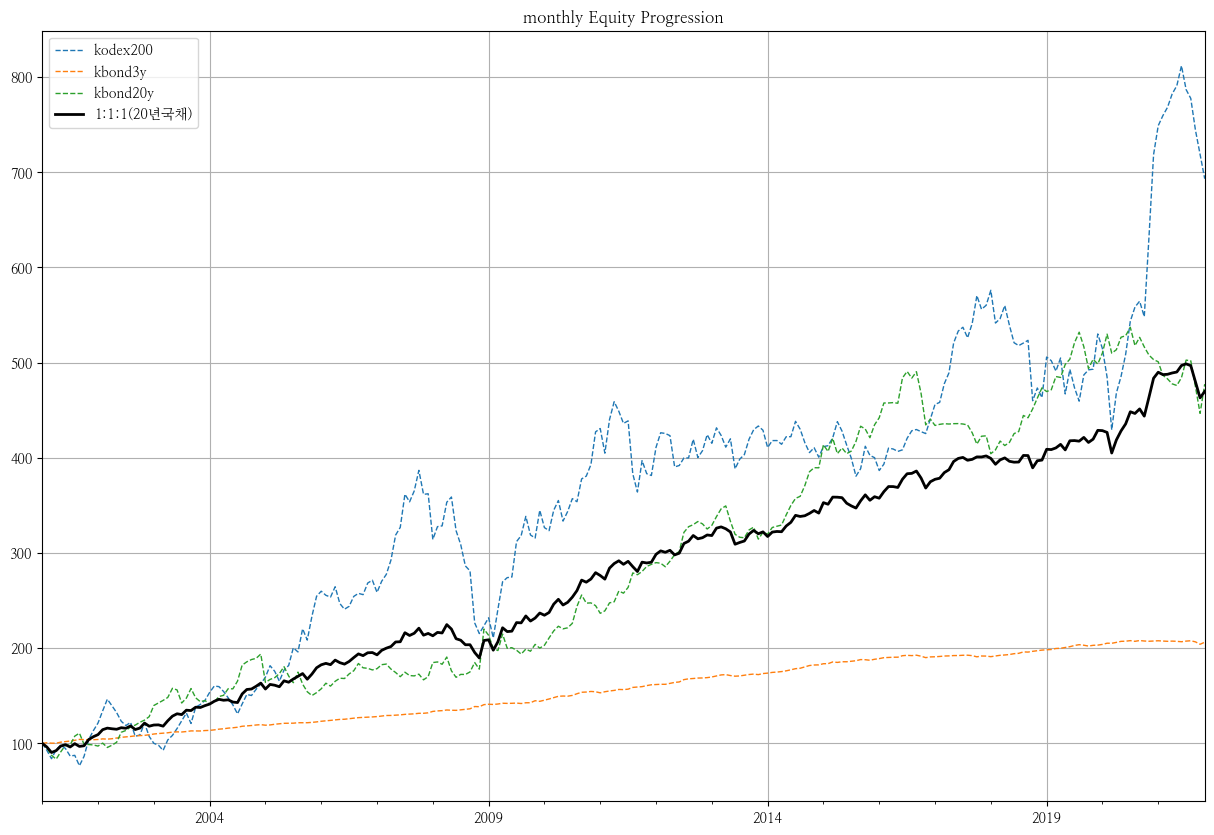

In [11]:
ax1 = r20_assets.plot(freq='M', ls='--', figsize=(15,10));
r20.plot(ax=ax1, freq='M', color='black', lw=2, figsize=(15, 10));

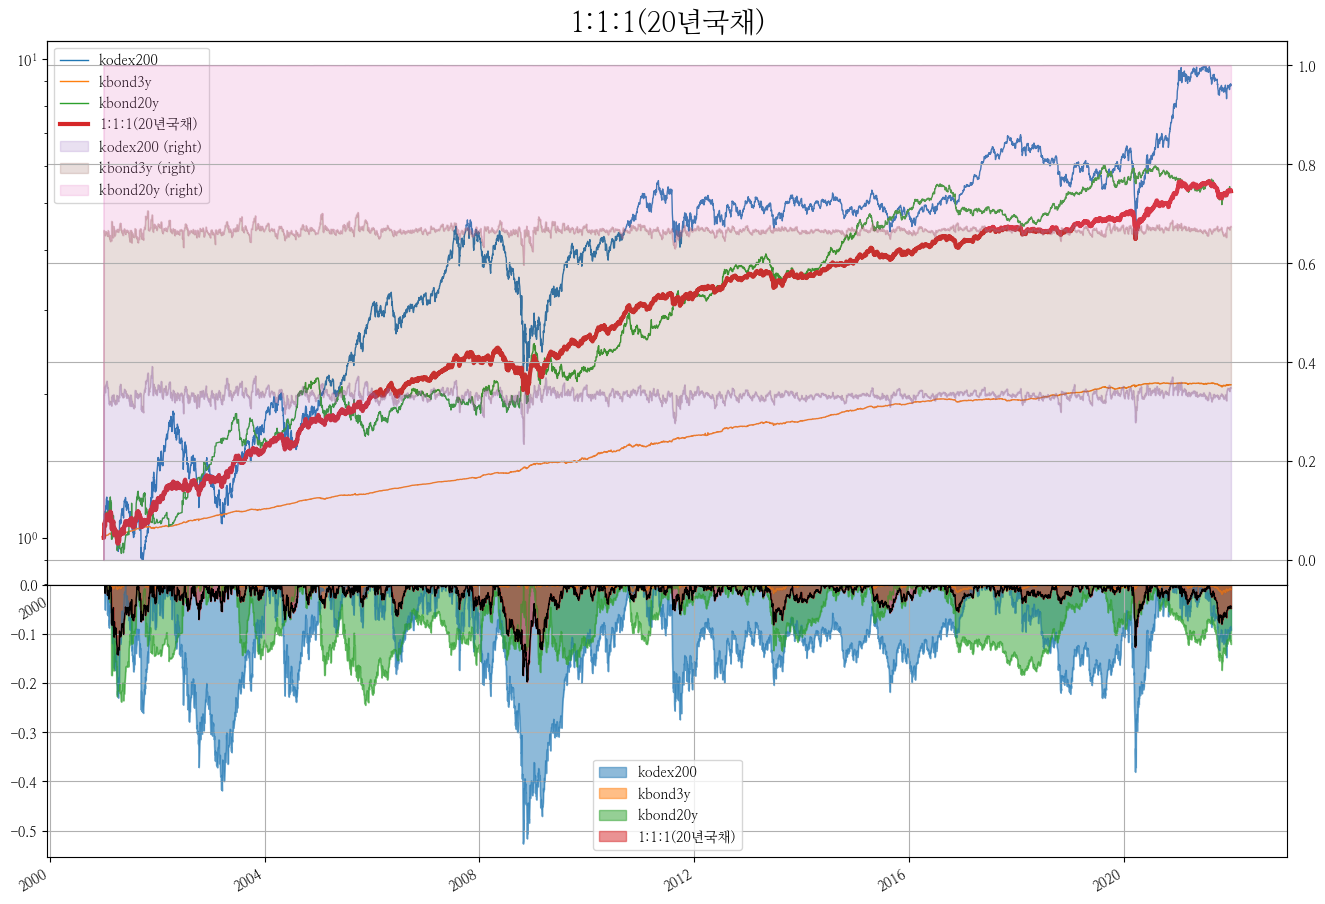

In [12]:
plot_assets(r20_all, '2000', '2021', '1:1:1(20년국채)')

In [13]:
r20_all.prices[:'2017-6'].calc_stats().display()

Stat                 kodex200    kbond3y     kbond20y    1:1:1(20년국채)
-------------------  ----------  ----------  ----------  -----------------
Start                2001-01-01  2001-01-01  2001-01-01  2001-01-01
End                  2017-06-30  2017-06-30  2017-06-30  2017-06-30
Risk-free rate       0.00%       0.00%       0.00%       0.00%

Total Return         536.50%     94.82%      384.99%     341.90%
Daily Sharpe         0.60        2.84        0.73        1.06
Daily Sortino        0.97        4.68        1.10        1.73
CAGR                 11.88%      4.13%       10.05%      9.43%
Max Drawdown         -52.67%     -1.75%      -24.47%     -19.74%
Calmar Ratio         0.23        2.35        0.41        0.48

MTD                  2.42%       0.01%       0.02%       0.82%
3m                   11.36%      0.29%       0.33%       3.92%
6m                   20.96%      0.75%       -1.06%      6.54%
YTD                  20.96%      0.75%       -1.06%      6.54%
1Y                   30

## 숙제 10년만기국채, 동일비중매수후홀딩